#Split and Merge Segmentation

Saving kohli_71_1683829193033_1692354506172.webp to kohli_71_1683829193033_1692354506172.webp


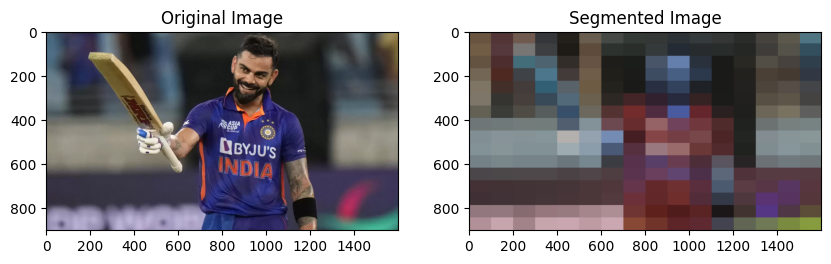

In [3]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO

# Function for image segmentation using split and merging
def split_and_merge(image, min_size=100):
    # Get image dimensions
    rows, cols, _ = image.shape

    # Check if the image size is smaller than the specified min_size
    if rows < min_size or cols < min_size:
        return np.mean(image, axis=(0, 1))

    # Split the image into quadrants
    top_left = image[:rows//2, :cols//2, :]
    top_right = image[:rows//2, cols//2:, :]
    bottom_left = image[rows//2:, :cols//2, :]
    bottom_right = image[rows//2:, cols//2:, :]

    # Merge quadrants based on average color
    avg_color_tl = np.mean(top_left, axis=(0, 1))
    avg_color_tr = np.mean(top_right, axis=(0, 1))
    avg_color_bl = np.mean(bottom_left, axis=(0, 1))
    avg_color_br = np.mean(bottom_right, axis=(0, 1))

    # Recursively split and merge each quadrant
    merged_image = np.zeros_like(image, dtype=np.uint8)
    merged_image[:rows//2, :cols//2, :] = split_and_merge(top_left, min_size)
    merged_image[:rows//2, cols//2:, :] = split_and_merge(top_right, min_size)
    merged_image[rows//2:, :cols//2, :] = split_and_merge(bottom_left, min_size)
    merged_image[rows//2:, cols//2:, :] = split_and_merge(bottom_right, min_size)

    return merged_image

# Upload an image from your local system
uploaded = files.upload()

# Check if any file is uploaded
if len(uploaded) == 0:
    print("No file uploaded.")
else:
    # Load the uploaded image
    file_name = next(iter(uploaded))
    image_bytes = uploaded[file_name]
    image_np = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)

    # Check if the image is loaded successfully
    if image_np is None:
        print(f"Failed to load image: {file_name}")
    else:
        # Perform split and merge segmentation
        segmented_image = split_and_merge(image_np)

        # Display the original and segmented images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(segmented_image)
        plt.title('Segmented Image')

        plt.show()


# Region Growing segmentation

Saving kohli_71_1683829193033_1692354506172.webp to kohli_71_1683829193033_1692354506172 (1).webp


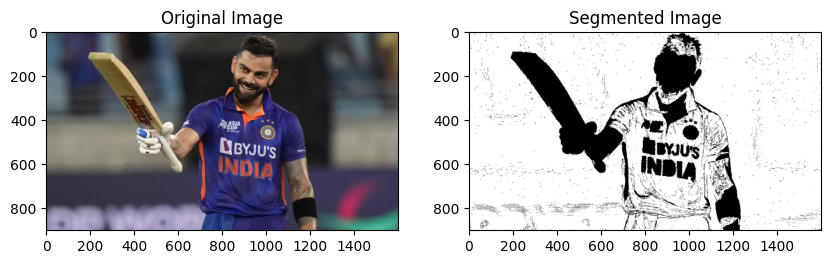

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def region_growing(img, seed, thresh=5):
    rows, cols = img.shape[:2]
    seg_img = np.zeros((rows, cols), dtype=np.uint8)
    checked = np.zeros_like(seg_img)

    seed_list = [seed]
    while len(seed_list) > 0:
        x, y = seed_list.pop(0)
        for dx in range(-1, 2):
            for dy in range(-1, 2):
                nx, ny = x + dx, y + dy
                if nx >= 0 and nx < rows and ny >= 0 and ny < cols:
                    if checked[nx, ny] == 0:
                        intensity_diff = abs(int(img[nx, ny]) - int(img[x, y]))
                        if intensity_diff < thresh:
                            seg_img[nx, ny] = 255
                            seed_list.append((nx, ny))
                        checked[nx, ny] = 1
    return seg_img

# Upload an image from your local system
uploaded = files.upload()

# Check if any file is uploaded
if len(uploaded) == 0:
    print("No file uploaded.")
else:
    # Load the uploaded image
    file_name = next(iter(uploaded))
    image_bytes = uploaded[file_name]
    image_np = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)

    # Check if the image is loaded successfully
    if gray_image is None:
        print(f"Failed to load image: {file_name}")
    else:
        # Define a seed point
        seed_point = (gray_image.shape[1] // 2, gray_image.shape[0] // 2)

        # Perform region growing segmentation
        segmented_image = region_growing(gray_image, seed_point)

        # Display the original and segmented images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(segmented_image, cmap='gray')
        plt.title('Segmented Image')

        plt.show()


# Image segmentation using Thresholding

Saving kohli_71_1683829193033_1692354506172.webp to kohli_71_1683829193033_1692354506172 (2).webp


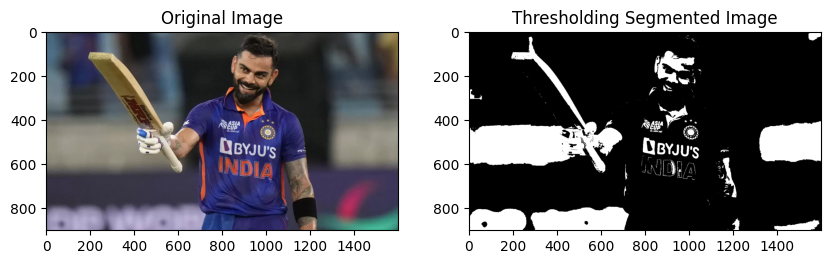

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def threshold_segmentation(image, threshold_value=127):
    # Convert the image to grayscale if it is colored
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Apply thresholding
    _, segmented_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

    return segmented_image

# Upload an image from your local system
uploaded = files.upload()

# Check if any file is uploaded
if len(uploaded) == 0:
    print("No file uploaded.")
else:
    # Load the uploaded image
    file_name = next(iter(uploaded))
    image_bytes = uploaded[file_name]
    image_np = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)

    # Check if the image is loaded successfully
    if image_np is None:
        print(f"Failed to load image: {file_name}")
    else:
        # Define a threshold value (this can be adjusted based on your needs)
        threshold_value = 127 # This is a common default value

        # Perform thresholding segmentation
        segmented_image = threshold_segmentation(image_np, threshold_value)

        # Display the original and segmented images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(segmented_image, cmap='gray')
        plt.title('Thresholding Segmented Image')

        plt.show()
